Image("I.jpg")

# Life Expectancy (WHO)
## Statistical Analysis on factors influencing Life Expectancy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.display import Image

In [3]:
df = pd.read_csv('life_expectancy_data.csv')
desc = pd.read_csv('data_description.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.rename(columns={'Country': 'country', 'Year': 'year', 'Status': 'status', 'Life expectancy ': 'life_expectancy', 'Adult Mortality':'adult_mortality', 'infant deaths':'infant_deaths', 'Alcohol':'alcohol', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'hepatitis_b', 'Measles ':'measles', ' BMI ':'bmi', 'under-five deaths ':'under_five_deaths', 'Polio':'polio', 'Total expenditure':'total_expenditure', 'Diphtheria ':'diphtheria', ' HIV/AIDS':'hiv_aids', 'GDP':'gdp', 'Population':'population', ' thinness  1-19 years':'thinness_1-19', ' thinness 5-9 years':'thinness_5-9', 'Income composition of resources':'income_composition', 'Schooling':'schooling'}, inplace=True)
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1-19,thinness_5-9,income_composition,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
desc

,Variable,Type,Definition
0,Country,Categorical,Country
1,Year,Categorical,Year
2,Status,Categorical,Status refers to whether a nation is Developin...
3,Life expectancy,Numerical,Life expectancy is a statistical measure of th...
4,Adult Mortality,Numerical,Probability of dying between 15 and 60 years p...
5,infant deaths,Numerical,"The number of deaths per 1,000 live births of ..."
6,Alcohol,Numerical,Alcohol consumption per capita for people aged...
7,percentage expenditure,Numerical,Expenditure on health as a percentage of GDP p...
8,Hepatitis B,Numerical,HepB immunization coverage among 1-year olds(%)
9,Measles,Numerical,No of reported cases per 1000 population


## Data Exploration

##### Analyzing Life Expectancy

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: life_expectancy, dtype: float64


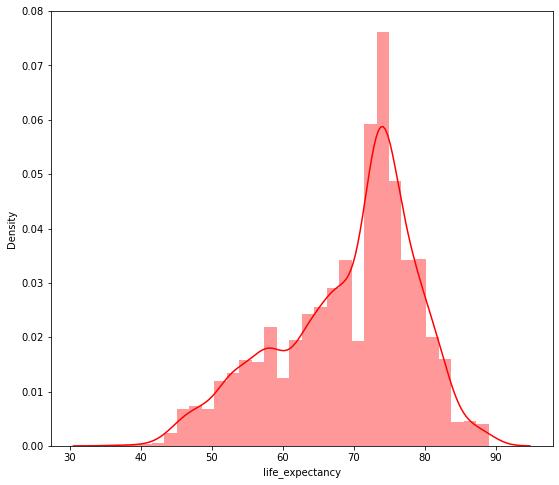

In [7]:
#descriptive statistics summary and histogram

print(df['life_expectancy'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['life_expectancy'], color='r');

#df['life_expectancy'].describe()

* Deviate from the normal distribution.<br>
* Have appreciable negative skewness.<br>
* Show peakedness.<br>

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df['life_expectancy'].skew())
print("Kurtosis: %f" % df['life_expectancy'].kurt())

Skewness: -0.638605
Kurtosis: -0.234477


##### Relationship with categorical features

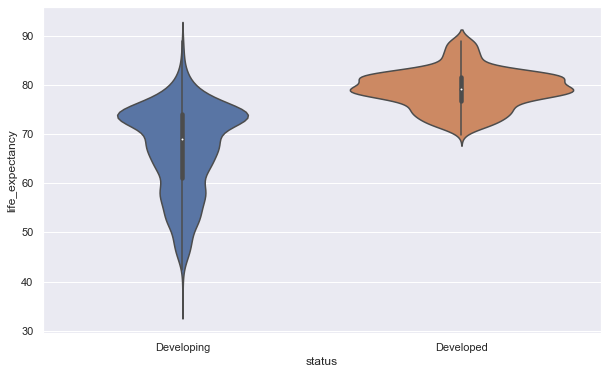

In [20]:
#box plot Status/Life Expectancy
var = 'status'
data = pd.concat([df['life_expectancy'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.violinplot(x=var, y="life_expectancy", data=data)
#fig.axis(ymin=0, ymax=800000);

Life Expectancy is higher in developed countries

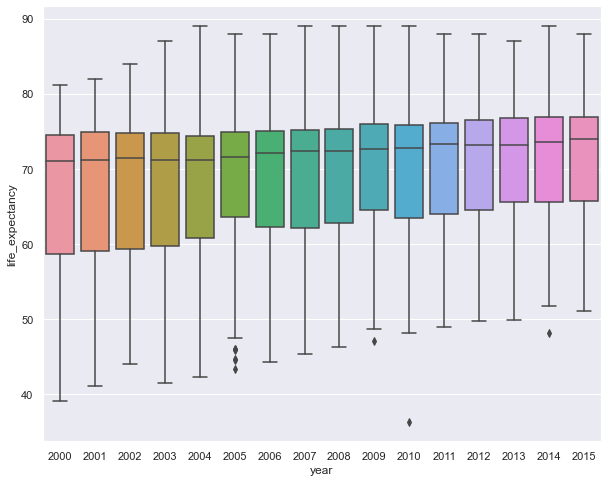

In [22]:
#box plot Year/Life Expectancy
var = 'year'
data = pd.concat([df['life_expectancy'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="life_expectancy", data=data)
#fig.axis(ymin=0, ymax=800000);

Life Expectancy shayad har saal thodi badh rahi hai

[How to Perform an F-Test in Python](https://www.statology.org/f-test-python/)
<br>Page 74 (fig 2.3, f value and significance level)


##### Correlation matrix (heatmap style)

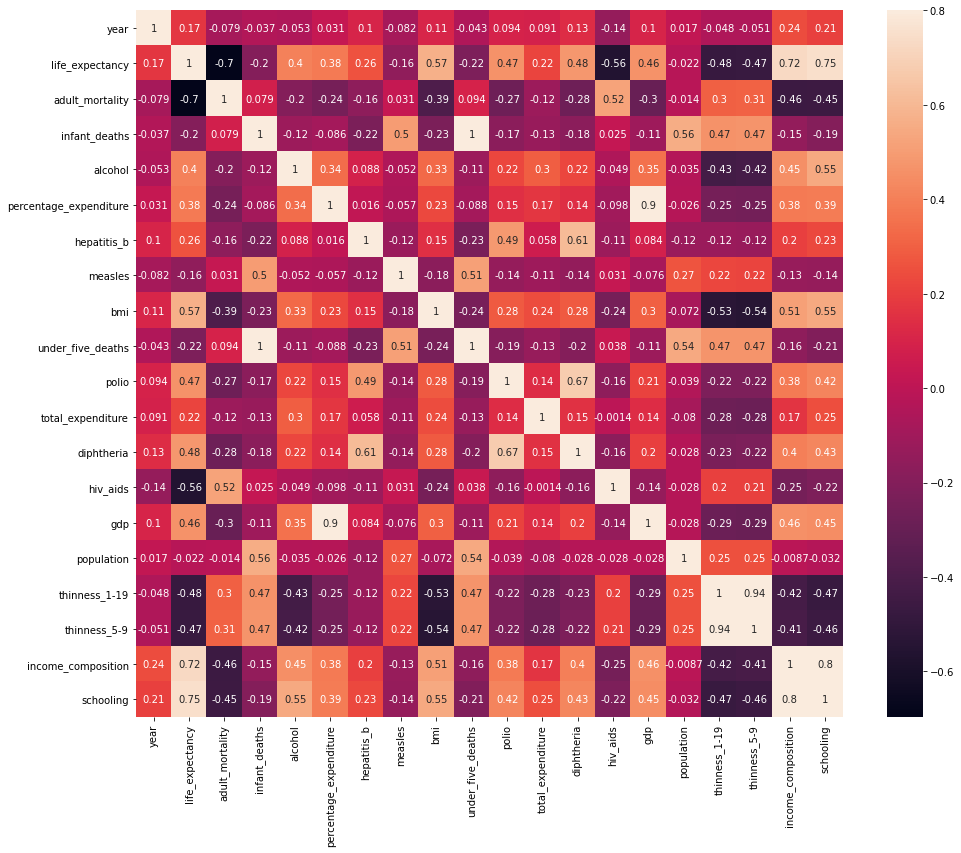

In [11]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

#saleprice correlation matrix
#cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cm = np.corrcoef(df_train[cols].values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

#### In the above correlation map,

* -1 indicates a perfectly negative linear correlation between two variables.<br>
* 0 indicates no linear correlation between two variables.<br>
* 1 indicates a perfectly positive linear correlation between two variables.<br>

##### Scatter plots between 'Life Expectancy' and Correlated Variables 

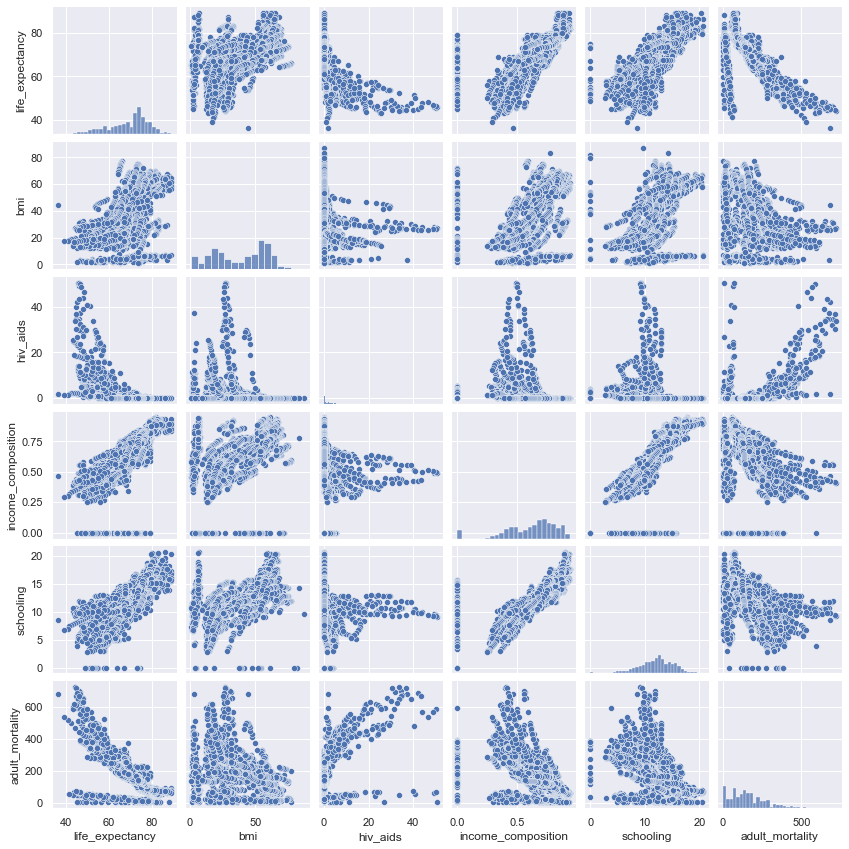

In [19]:
#scatterplot
sns.set()
cols = ['life_expectancy', 'bmi', 'hiv_aids', 'income_composition', 'schooling', 'adult_mortality']
sns.pairplot(df[cols], size = 2)
plt.show();

Baad me dimaag lagayenge

##### Missing data
Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

<br>The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

must understand the processes leading to the missing data in order to select the appropriate course of action.

In [13]:
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

,Total Null Val,Null Value %
population,652,22.191967
hepatitis_b,553,18.822328
gdp,448,15.248468
total_expenditure,226,7.692308
alcohol,194,6.603131
income_composition,167,5.684139
schooling,163,5.547992
bmi,34,1.157250
thinness_1-19,34,1.157250
thinness_5-9,34,1.157250


*********************** Population column should be removed (hai bhi bakwas!!) ***************************

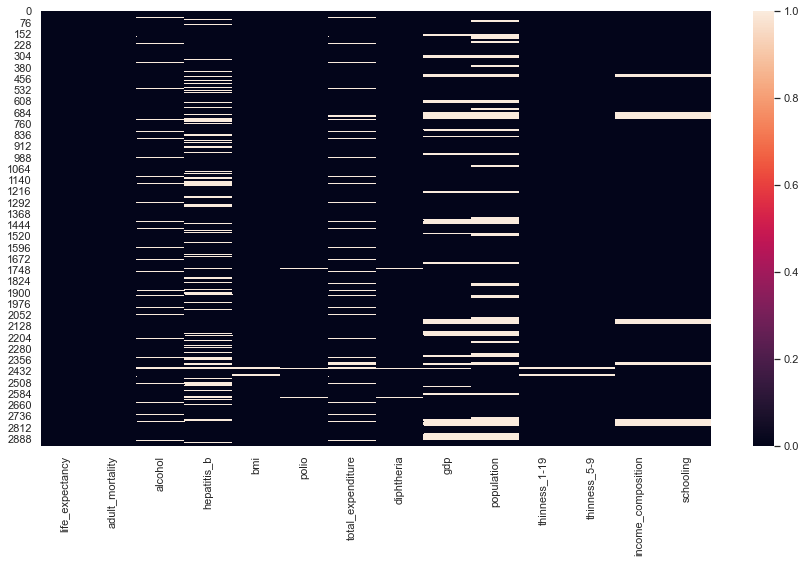

In [18]:
# Visualize missing values using heatmap. If there is any pattern in the missing data.
# White lines represent missing values
plt.figure(figsize=(15, 8))
sns.heatmap(df[col_na].isnull())
plt.show()

##### Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

###### Univariate analysis
The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1